# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
%cd "../WeatherPy"
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

/Users/SJR/Northwestern/06-Python-APIs/python-api-challenge/WeatherPy


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}units={units}&APPID={weather_api_key}&q="

names = []
country = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
datetime = []

In [15]:
# iterate through cities
city_id = 0
for city in cities:
    response = requests.get(query_url + city).json()

# check to see if api url calls are correct
#     print(query_url + city)
    try:
        names.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        datetime.append(response['dt'])
        print(f"Getting data for {city_id} {city}")
    except:
        print(f"No data found for {city_id} {city}")
        pass
    city_id = city_id +1  

Getting data for 0 aykhal
Getting data for 1 qiyang
No data found for 2 saleaula
Getting data for 3 hilo
Getting data for 4 leningradskiy
Getting data for 5 albany
No data found for 6 dolbeau
Getting data for 7 punta arenas
Getting data for 8 busselton
Getting data for 9 yellowknife
Getting data for 10 barrow
Getting data for 11 berlevag
Getting data for 12 ambagarh chauki
Getting data for 13 nikolskoye
Getting data for 14 campbell river
Getting data for 15 vaini
Getting data for 16 mao
Getting data for 17 half moon bay
Getting data for 18 dingle
Getting data for 19 wanning
Getting data for 20 longyearbyen
No data found for 21 temaraia
Getting data for 22 poya
Getting data for 23 sunrise manor
Getting data for 24 georgetown
No data found for 25 illoqqortoormiut
Getting data for 26 bambous virieux
Getting data for 27 carnarvon
Getting data for 28 jalaud
Getting data for 29 el jicaro
Getting data for 30 pevek
Getting data for 31 adrar
Getting data for 32 constitucion
Getting data for 33 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# create dataframe

city_df = pd.DataFrame({
    "City": names,
    "Lat": lat,
    "Lng": long,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": datetime
})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aykhal,66.00,111.50,51.80,87,90,4.47,RU,1595102745
1,Qiyang,26.59,111.85,80.92,76,100,6.60,CN,1595102745
2,Hilo,19.73,-155.09,84.20,62,75,4.70,US,1595102514
3,Leningradskiy,69.38,178.42,37.72,82,100,10.38,RU,1595102745
4,Albany,42.60,-73.97,91.99,36,3,4.79,US,1595102607
...,...,...,...,...,...,...,...,...,...
549,Samoded,63.61,40.51,52.92,77,69,2.39,RU,1595102426
550,Pocatello,42.87,-112.45,82.00,28,1,12.75,US,1595102426
551,Zernograd,46.85,40.31,66.00,77,0,11.01,RU,1595102426
552,Lukh,57.01,42.26,56.86,94,100,6.24,RU,1595102427


In [20]:
# export dataframe to csv file
city_df.to_csv(output_data_file, index=False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
# check to see if any city has humidity over 100
high_hum = city_df[city_df["Humidity"] > 100]

# display results
high_hum

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


My data does not contain any cities with humidity over 100%, so I moved directly to the next challenge.

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

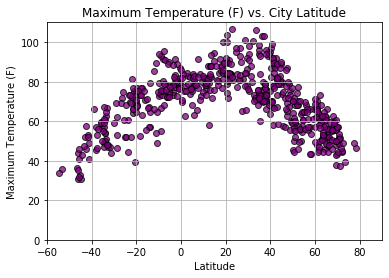

In [55]:
plt.scatter(lat, temp, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.xlim(-60, 90)
plt.ylim(0, 110)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("Maximum Temperature (F) vs. City Latitude")
plt.grid()
plt.savefig("Images/MaxTempVsLat.png")
plt.show()

The Maximum Temperature (F) vs. City Latitude scatter plot demonstrates the maximum temperature for the random cities selected in this dataset versus the those cities' latitude.

## Latitude vs. Humidity Plot

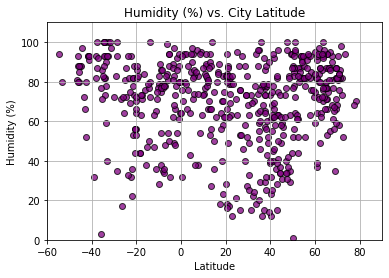

In [56]:
plt.scatter(lat, humid, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.xlim(-60, 90)
plt.ylim(0, 110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. City Latitude")
plt.grid()
plt.savefig("Images/HumidityVsLat.png")
plt.show()

The Humidity (%) vs. City Latitude scatter plot demonstrates the humidity percentage for the random cities selected in this dataset versus the those cities' latitude.

## Latitude vs. Cloudiness Plot

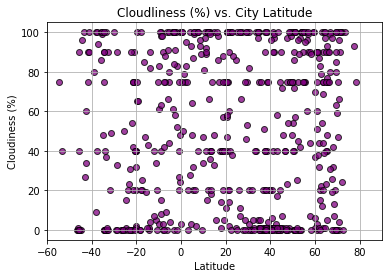

In [57]:
plt.scatter(lat, cloud, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.xlim(-60, 90)
plt.ylim(-5, 105)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudliness (%) vs. City Latitude")
plt.grid()
plt.savefig("Images/CloudsVsLat.png")
plt.show()

The Cloudiness (%) vs. City Latitude scatter plot demonstrates the cloudiness percentage for the random cities selected in this dataset versus the those cities' latitude.

## Latitude vs. Wind Speed Plot

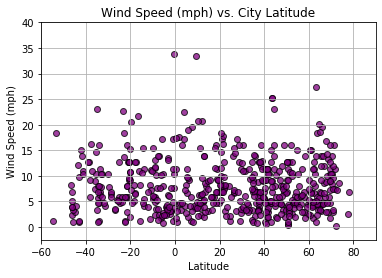

In [58]:
plt.scatter(lat, wind, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.xlim(-60, 90)
plt.ylim(-2.5, 40)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. City Latitude")
plt.grid()
plt.savefig("Images/WindVsLat.png")
plt.show()

The Wind Speed (mph) vs. City Latitude scatter plot demonstrates the windspeed in miles per hour for the random cities selected in this dataset versus the those cities' latitude.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [73]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_df[city_df["Lat"] >= 0]
southern = city_df[city_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [93]:
# set up regression
north_cities = northern["Lat"].values
north_temp = northern["Max Temp"].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities, north_temp)
regress_values = north_cities * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.48293727524596824


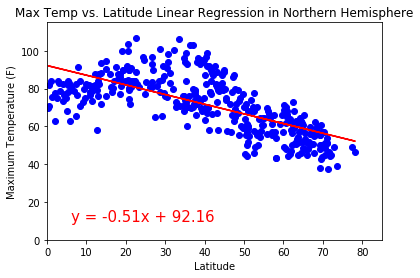

In [98]:
# create scatter plot
plt.scatter(north_cities, north_temp, marker="o", facecolors="blue")
plt.plot(north_cities,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(0, 85)
plt.ylim(0, 115)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression in Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/MaxTempVsLatRegression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression